In [ ]:
## 

## Double-kink transition configurations

$x_{disl}(z, \tau)$: dislocation shape of the double-kink transition state versus applied stress, $\tau$

$$x_{disl}(z, \tau)/a = g(z,\tau)+g_{eq}(\tau)$$
 The configurations are usually fitted to a function form for $g(z,\tau)$ as 

$$g(z, \tau)=\frac{1}{2}\left(\tanh\left[\frac{z/b+\zeta(\tau)}{\alpha(\tau)}\right]-\tanh\left[\frac{z/b-\zeta(\tau)}{\alpha(\tau)}\right]\right)$$

where $\alpha$, $\zeta$ are fitting  parameters and $g_{eq}(\tau)$ is the initial straight screw dislocation position at stress $\tau$.

In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

def g(z, tau, alpha, zeta):
    return 0.5*(np.tanh((z+zeta)/alpha)-np.tanh((z-zeta)/alpha))

# Example

In [60]:
alpha_data = {0: 4.347, 0.1: 4.347, 0.2: 4.381, 0.3: 4.444, 0.4: 4.571, 0.5: 4.792, 0.6: 5.184, 0.7: 5.755, 0.8: 6.725, 0.9: 7.886, 1: 0}
zeta_data = {0: 6.987, 0.1: 6.987, 0.2: 5.367, 0.3: 4.487, 0.4: 3.918, 0.5: 3.584, 0.6: 3.419, 0.7: 3.311, 0.8: 3.241, 0.9: 2.666, 1: 0}
geq_data = {0: 0, 0.1: 0, 0.2: 0.01, 0.3: 0.02, 0.4: 0.03, 0.5: 0.04, 0.6: 0.05, 0.7: 0.06, 0.8: 0.08, 0.9: 0.14, 1: 0.365}

# Convert to numpy arrays
x_alpha = np.array(list(alpha_data.keys()))
y_alpha = np.array(list(alpha_data.values()))

x_zeta = np.array(list(zeta_data.keys()))
y_zeta = np.array(list(zeta_data.values()))

x_geq = np.array(list(geq_data.keys()))
y_geq = np.array(list(geq_data.values()))

# Create interpolation functions
alpha_interp = interp1d(x_alpha, y_alpha, kind='cubic')  # Cubic interpolation
zeta_interp = interp1d(x_zeta, y_zeta, kind='cubic')
geq_interp = interp1d(x_geq, y_geq, kind='cubic')

/tmp/ipykernel_186611/1362033351.py:7: RuntimeWarning: divide by zero encountered in divide
  return 0.5*(np.tanh((z+zeta)/alpha)-np.tanh((z-zeta)/alpha))


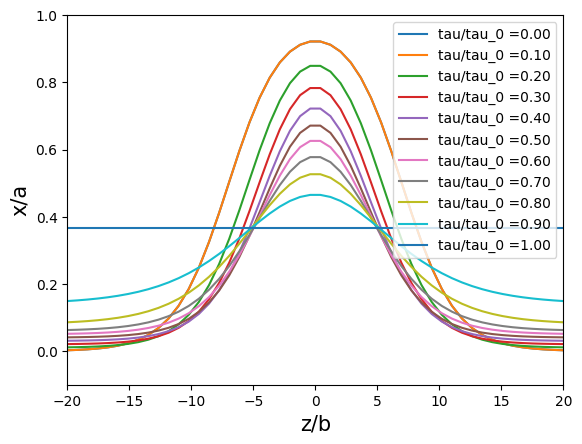

In [71]:
z = np.linspace(-20, 20, 50)
tau_list = np.linspace(0, 1, 11)


fig = plt.figure()
for tau in tau_list:
    alpha, zeta, geq = alpha_interp(tau), zeta_interp(tau), geq_interp(tau)
    plt.plot(z, g(z, tau, alpha, zeta)+geq, label=f'tau/tau_0 ={tau:.2f}')
    plt.xlim(-20, 20)
    plt.ylim(-0.1, 1)
    plt.xlabel("z/b" , fontsize=15)
    plt.ylabel("x/a" , fontsize=15)
    plt.legend()